<a href="https://colab.research.google.com/github/Varsh999/MLprojectssss/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
Shape: (12330, 18)

🔹 First 5 rows:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb             

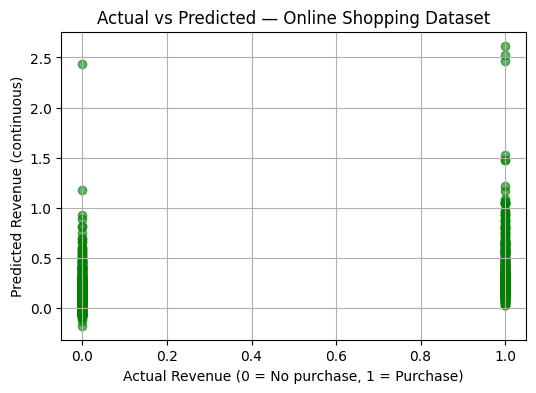


🔹 Feature Importance:
                    Feature  Coefficient
6               BounceRates     0.536088
10                    Month     0.009751
16                  Weekend     0.009008
8                PageValues     0.008995
2             Informational     0.007194
12                  Browser     0.002985
0            Administrative     0.000675
14              TrafficType     0.000600
4            ProductRelated     0.000306
5   ProductRelated_Duration     0.000011

📘 Summary:
- RMSE = 0.319
- R² = 0.268


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1️⃣ Load real dataset from URL
url = "https://raw.githubusercontent.com/sharmaroshan/Online-Shoppers-Purchasing-Intention/master/online_shoppers_intention.csv"  # dataset URL :contentReference[oaicite:1]{index=1}
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\n🔹 First 5 rows:")
print(df.head())

# 2️⃣ Encode categorical variables
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# 3️⃣ Save dataset as CSV locally
csv_filename = "online_shoppers_intention.csv"
df.to_csv(csv_filename, index=False)
print(f"\n📁 Dataset saved as: {csv_filename}")

# 4️⃣ Define features (X) and target (y)
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# 5️⃣ Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6️⃣ Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
print("\n✅ Model training complete!")

# 7️⃣ Make predictions
y_pred = model.predict(X_test)

# 8️⃣ Evaluate model performance with RMSE & R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\n📊 Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# 9️⃣ Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Revenue': y_test.values[:10],
    'Predicted Revenue': y_pred[:10]
})
print("\n🔹 Actual vs Predicted (first 10 rows):")
print(comparison)

# 🔟 Visualization
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.xlabel("Actual Revenue (0 = No purchase, 1 = Purchase)")
plt.ylabel("Predicted Revenue (continuous)")
plt.title("Actual vs Predicted — Online Shopping Dataset")
plt.grid(True)
plt.show()

# 🧠 Feature Importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\n🔹 Feature Importance:")
print(coef_df.head(10))

print("\n📘 Summary:")
print(f"- RMSE = {rmse:.3f}")
print(f"- R² = {r2:.3f}")
